In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import os

In [3]:
data_dir = os.path.join(os.pardir, "data")
raw_dir = os.path.join(data_dir, "raw")

## Training Data

In [5]:
train = pd.read_csv(os.path.join(raw_dir, "train", "train.csv"), nrows=10000000,
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [6]:
train.shape

(10000000, 2)

In [10]:
for n in range(5):
    print(train["time_to_failure"].values[n])

1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999


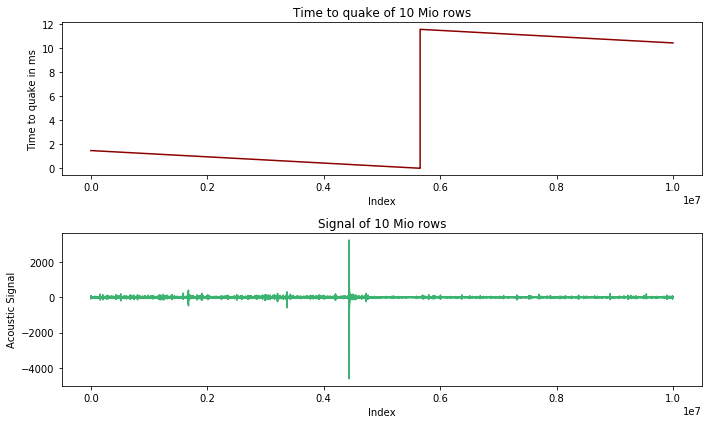

In [14]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(train.index.values, train["time_to_failure"].values, c="darkred")
ax[0].set_title("Time to quake of 10 Mio rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake in ms");
ax[1].plot(train.index.values, train["acoustic_data"].values, c="mediumseagreen")
ax[1].set_title("Signal of 10 Mio rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Acoustic Signal");
plt.tight_layout()

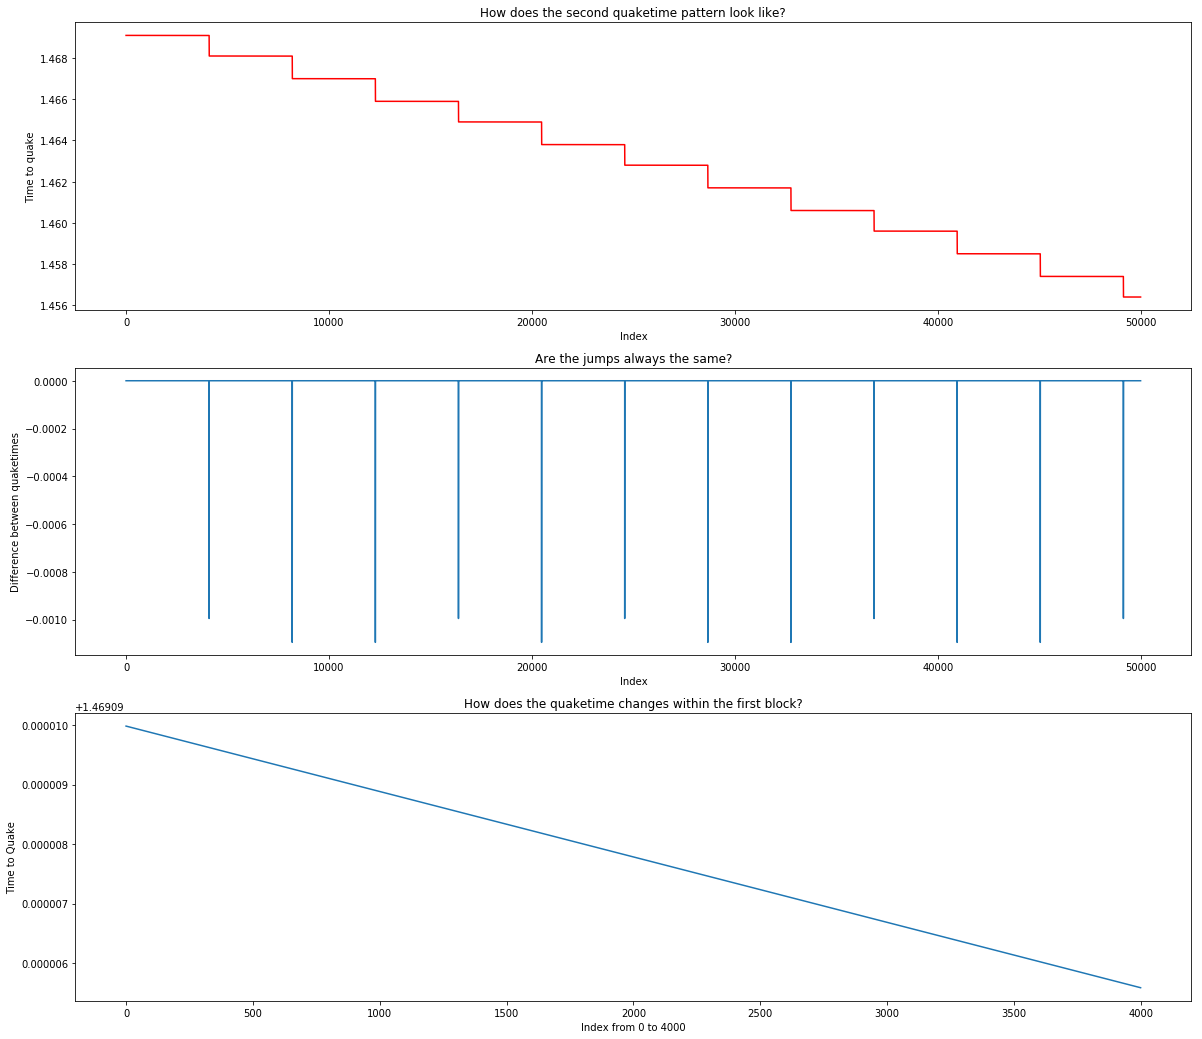

In [15]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train.index.values[0:50000], train["time_to_failure"].values[0:50000], c="Red")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake")
ax[0].set_title("How does the second quaketime pattern look like?")
ax[1].plot(train.index.values[0:49999], np.diff(train["time_to_failure"].values[0:50000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Are the jumps always the same?")
ax[2].plot(train.index.values[0:4000], train["time_to_failure"].values[0:4000])
ax[2].set_xlabel("Index from 0 to 4000")
ax[2].set_ylabel("Time to Quake")
ax[2].set_title("How does the quaketime changes within the first block?");

## Test Data

In [18]:
test_dir = os.path.join(raw_dir, "test")
test_files = os.listdir(test_dir)
print(test_files[0:5])

['seg_51f0a2.csv', 'seg_de98fa.csv', 'seg_ad82ca.csv', 'seg_e3ca24.csv', 'seg_64f8dc.csv']


In [19]:
len(test_files)

2624

In [21]:
seg.head()

,acoustic_data
0,14
1,13
2,13
3,17
4,8


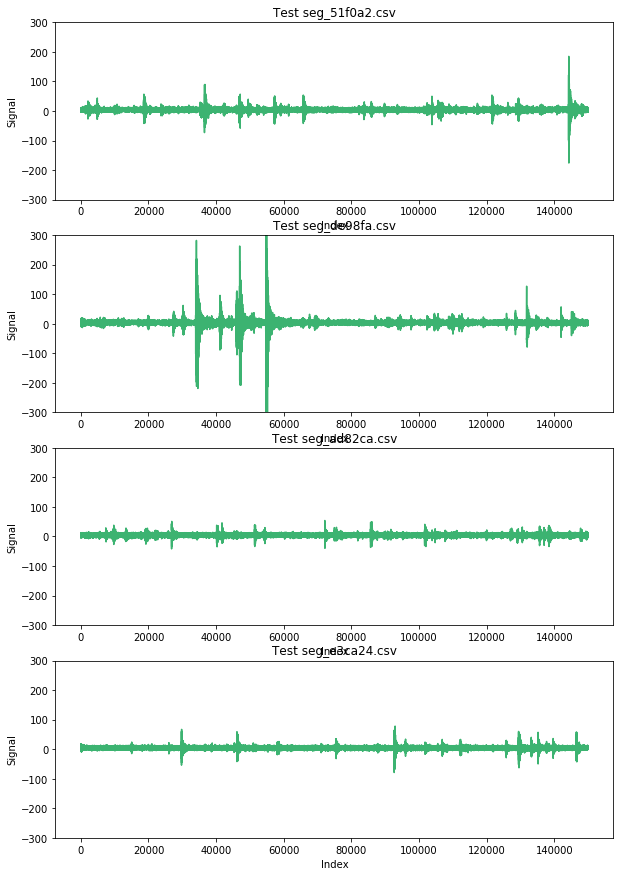

In [20]:
fig, ax = plt.subplots(4,1, figsize=(10,15))

for n in range(4):
    seg = pd.read_csv(os.path.join(test_dir, test_files[n]))
    ax[n].plot(seg["acoustic_data"].values, c="mediumseagreen")
    ax[n].set_xlabel("Index")
    ax[n].set_ylabel("Signal")
    ax[n].set_ylim([-300, 300])
    ax[n].set_title("Test {}".format(test_files[n]));

## Train signal distribution

In [22]:
train["acoustic_data"].describe()

count    1.000000e+07
mean     4.502072e+00
std      1.780707e+01
min     -4.621000e+03
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      3.252000e+03
Name: acoustic_data, dtype: float64

In [23]:
low = train["acoustic_data"].mean() - 3 * train["acoustic_data"].std()
high = train["acoustic_data"].mean() + 3 * train["acoustic_data"].std()

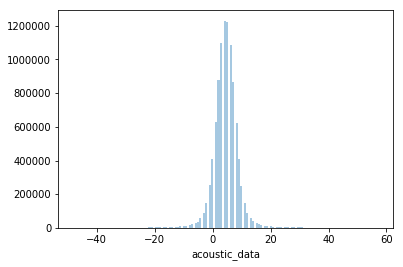

In [29]:
index = (train["acoustic_data"] > low) & (train["acoustic_data"] < high)
sns.distplot(train.loc[index, "acoustic_data"], kde=False, bins=150)

In [31]:
np.histogram(train["acoustic_data"])

(array([      5,      13,      32,     132,     343, 9995729,    3341,
            265,      98,      42]),
 array([-4621. , -3833.7, -3046.4, -2259.1, -1471.8,  -684.5,   102.8,
          890.1,  1677.4,  2464.7,  3252. ]))

(0, 100)

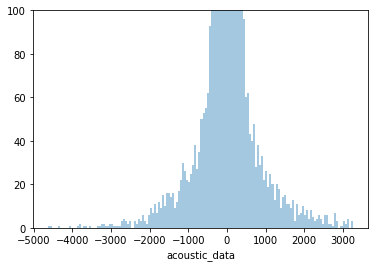

In [35]:
f, ax = plt.subplots()
sns.distplot(train["acoustic_data"], kde=False, bins=150, ax=ax)
ax.set_ylim([0, 100])

In [39]:
stepsize = np.diff(train["time_to_failure"])
train = train.drop(train.index[len(train)-1])
train = train.assign(stepsize = stepsize)

In [40]:
train.stepsize = train.stepsize.apply(lambda l: np.round(l, 10))

In [41]:
stepsize_counts = train.stepsize.value_counts()
stepsize_counts

-1.100000e-09    5655193
-1.000000e-09    3907597
-2.000000e-09     434767
-1.095496e-03        882
-1.095495e-03        679
-9.954955e-04        497
-9.954950e-04        381
-1.095497e-03          1
 1.154000e+01          1
Name: stepsize, dtype: int64

The giant stepsize of 11.54 seconds is the jump directly after the earthquake. Otherwise, the vast majority of stepsizes are 1 ns or very close to it. There are several hundred stepsizes that are close to 1 ms. 